https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

* Tensorflow Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [65]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# df=pd.read_csv('drive/MyDrive/Colab Notebooks/DATA/cancer_classification.csv')
df=pd.read_csv('cancer_classification.csv')

* Exploratory Data Analysis and Visualization

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


In [4]:
df.shape

(569, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

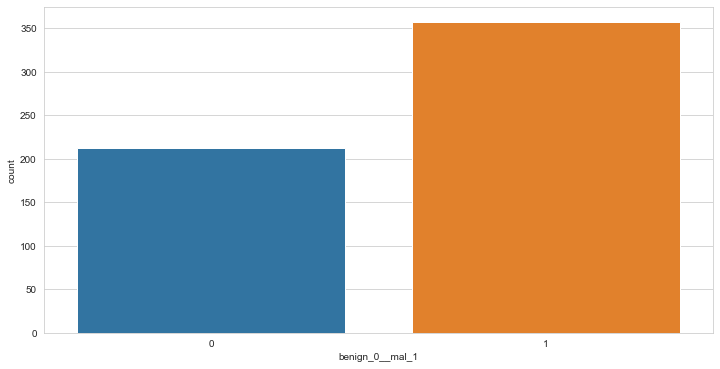

In [8]:
sns.countplot(x=df.benign_0__mal_1);

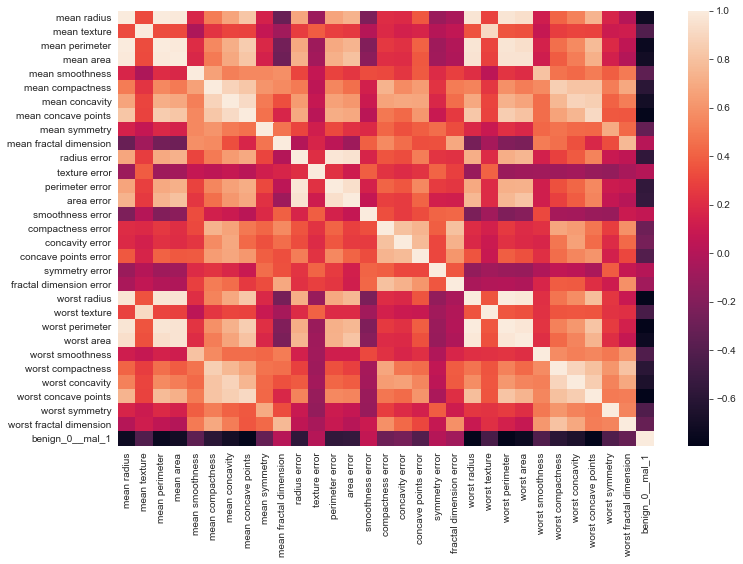

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr());

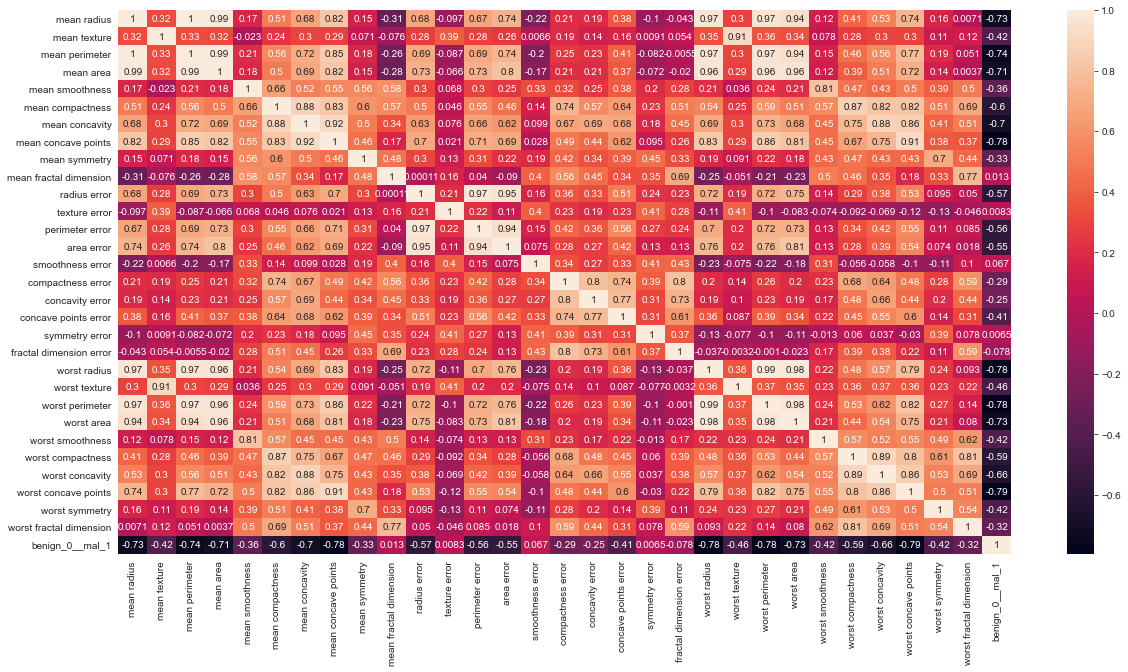

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

* Feature Engineering

In [11]:
drop_list = ["mean area", "mean perimeter", "worst area", "worst perimeter","perimeter error","area error"]

In [12]:
df.drop(drop_list, axis=1, inplace=True)

In [13]:
df.shape

(569, 25)

In [14]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.794
mean concave points       -0.777
worst radius              -0.776
mean radius               -0.730
mean concavity            -0.696
worst concavity           -0.660
mean compactness          -0.597
worst compactness         -0.591
radius error              -0.567
worst texture             -0.457
worst smoothness          -0.421
worst symmetry            -0.416
mean texture              -0.415
concave points error      -0.408
mean smoothness           -0.359
mean symmetry             -0.330
worst fractal dimension   -0.324
compactness error         -0.293
concavity error           -0.254
fractal dimension error   -0.078
symmetry error             0.007
texture error              0.008
mean fractal dimension     0.013
smoothness error           0.067
benign_0__mal_1            1.000
Name: benign_0__mal_1, dtype: float64

<AxesSubplot:>

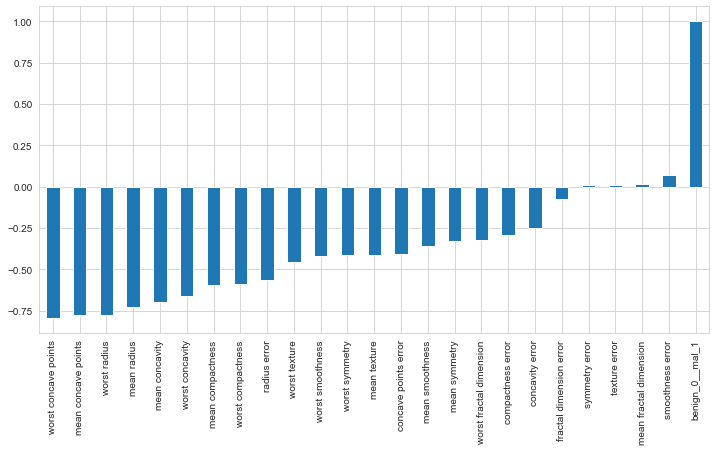

In [15]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [16]:
df.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'radius error', 'texture error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'benign_0__mal_1'],
      dtype='object')

* Train Test Split

In [17]:
X = df.drop("benign_0__mal_1", axis=1).values
y = df.benign_0__mal_1.values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

* Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Creating the Model

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [24]:
X_train.shape

(426, 24)

In [25]:
model = Sequential()

model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
14/14 [==============================] - 0s 8ms/step - loss: 0.6857 - accuracy: 0.4977 - val_loss: 0.6770 - val_accuracy: 0.5664
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7582 - val_loss: 0.6510 - val_accuracy: 0.7762
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.8333 - val_loss: 0.6225 - val_accuracy: 0.8392
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.8850 - val_loss: 0.5911 - val_accuracy: 0.8741
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.8967 - val_loss: 0.5553 - val_accuracy: 0.9021
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.9225 - val_loss: 0.5197 - val_accuracy: 0.9021
Epoch 7/500
14/14 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.9202 - val_loss: 0.4777 - val_accuracy: 0.9161
Epoch 8/500
1

In [27]:
model_loss = pd.DataFrame(model.history.history)

In [28]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.686,0.498,0.677,0.566
1,0.656,0.758,0.651,0.776
2,0.628,0.833,0.622,0.839
3,0.597,0.885,0.591,0.874
4,0.563,0.897,0.555,0.902


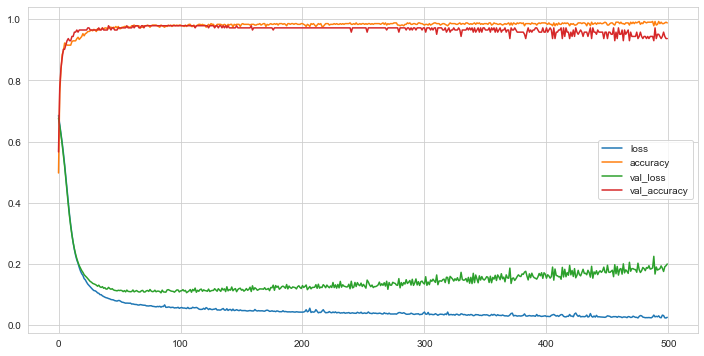

In [29]:
model_loss.plot();

* Early Stopping

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model = Sequential()
model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#The patience is often set somewhere between 10 and 100 (10 or 20 is more common), 
#but it really depends on your dataset and network.

In [32]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 6ms/step - loss: 0.7035 - accuracy: 0.4390 - val_loss: 0.6816 - val_accuracy: 0.6364
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.7629 - val_loss: 0.6533 - val_accuracy: 0.7832
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6377 - accuracy: 0.8638 - val_loss: 0.6287 - val_accuracy: 0.8392
Epoch 4/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6105 - accuracy: 0.8545 - val_loss: 0.6009 - val_accuracy: 0.8462
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5803 - accuracy: 0.8732 - val_loss: 0.5705 - val_accuracy: 0.8671
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.8803 - val_loss: 0.5358 - val_accuracy: 0.8881
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.5121 - accuracy: 0.8850 - val_loss: 0.4977 - val_accuracy: 0.9161
Epoch 8/600
1

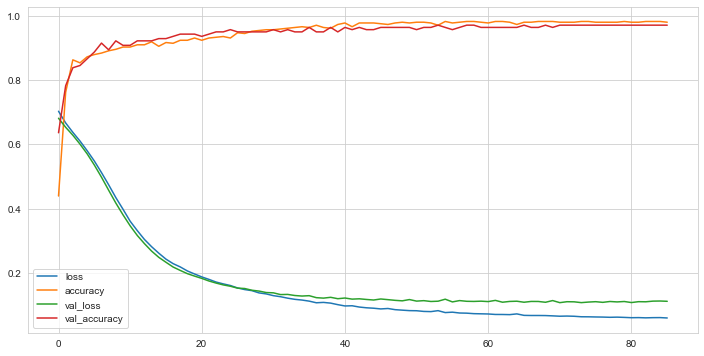

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

* Dropout Layers

In [35]:
from tensorflow.keras.layers import Dropout

In [36]:
model = Sequential()

model.add(Dense(units=24,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Dropout belirtilen yüzdelik (burada herbir layer daki nöronların yüzde ellisi (0.5) devre dısı) kadar nöronları devre dışı bırakıyor ve her seferin de kullanacağı nöronları rastgele seçiyor (bacpropagation ve epochs ile). Bu her seferinde nöronlardaki ağırlığı (w) değiştirerek verideki overfit i engellemeye çalışıyor. (Random Forest ın her seferinde rastgele fatures lardan rastgele data alması gibi)

In [37]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 7ms/step - loss: 0.7053 - accuracy: 0.5869 - val_loss: 0.6898 - val_accuracy: 0.6154
Epoch 2/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6965 - accuracy: 0.6150 - val_loss: 0.6640 - val_accuracy: 0.6783
Epoch 3/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6679 - accuracy: 0.6408 - val_loss: 0.6451 - val_accuracy: 0.7483
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.6948 - val_loss: 0.6271 - val_accuracy: 0.7902
Epoch 5/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.6315 - val_loss: 0.6113 - val_accuracy: 0.8042
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.6948 - val_loss: 0.5973 - val_accuracy: 0.7972
Epoch 7/600
14/14 [==============================] - 0s 1ms/step - loss: 0.6134 - accuracy: 0.6901 - val_loss: 0.5816 - val_accuracy: 0.8042
Epoch 8/600
1

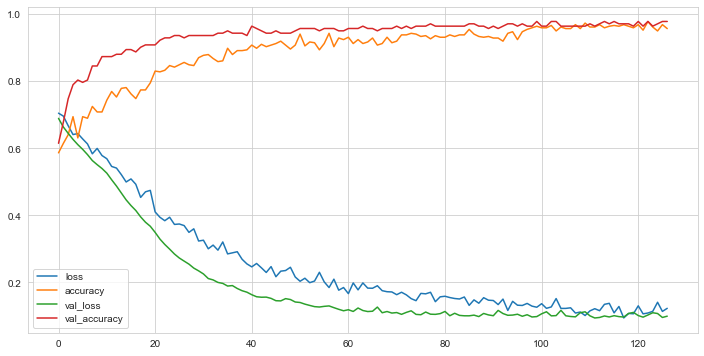

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

* Model Evaluation

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [42]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


* Making Predictions

In [43]:
df.sample(3)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
31,11.840,18.700,0.111,0.152,0.122,0.052,0.230,0.078,0.482,1.030,...,0.006,16.820,28.120,0.164,0.578,0.696,0.155,0.476,0.140,0
505,9.676,13.140,0.126,0.220,0.119,0.070,0.206,0.096,0.274,1.390,...,0.011,10.600,18.040,0.201,0.366,0.291,0.107,0.285,0.136,1
100,13.610,24.980,0.095,0.085,0.086,0.045,0.161,0.059,0.457,1.290,...,0.002,16.990,35.270,0.127,0.194,0.317,0.118,0.265,0.074,0


In [44]:
df.shape

(569, 25)

In [45]:
new_data = df.iloc[173][:-1]
# [:-1] 173 satırımızdaki verinin son sütununu almamasını sağlıyor. Çünkü on satır bizim label (target) sütunumuz ve biz bu sütunu tahmin etmeye çalışıyoruz.

In [46]:
new_data.shape

(24,)

In [47]:
new_data = scaler.transform(new_data.values.reshape(1,24))
# Modelimiz (..., 24) shape göre oluşturulduğu için örnek datamızı (1,24) shape dönüştürüyoruz.

In [48]:
new_data.shape

(1, 24)

In [49]:
model.predict_classes(new_data)

array([[1]])

In [50]:
df.head(2)

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,...,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,...,0.004,24.990,23.410,0.124,0.187,0.242,0.186,0.275,0.089,0


In [51]:
new_data1 = df.iloc[1][:-1]

In [52]:
new_data1 = scaler.transform(new_data1.values.reshape(1,24))

In [53]:
model.predict_classes(new_data1)

array([[0]])

In [54]:
new_data3 = df.iloc[[173,1]]

In [55]:
new_data3 = new_data3.iloc[:,:-1]

In [56]:
new_data3.shape

(2, 24)

In [57]:
new_data3 = scaler.transform(new_data3)

In [58]:
model.predict_classes(new_data3)

array([[1],
       [0]])

In [59]:
df.iloc[[173,1]]

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
173,11.080,14.710,0.101,0.057,0.024,0.026,0.157,0.067,0.207,1.805,...,0.005,11.350,16.820,0.122,0.082,0.039,0.043,0.190,0.073,1
1,20.570,17.770,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,...,0.004,24.990,23.410,0.124,0.187,0.242,0.186,0.275,0.089,0


* Comparison with ML

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[53  2]
 [ 4 84]]


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.98      0.95      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

